In [1]:
import pandas as pd

In [2]:
house = pd.read_excel("http://byungwan.com/class/House_Prices.xls")
house.head()

,HomeID,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [3]:
house2 = pd.get_dummies(house, columns=["Brick", "Neighborhood"], drop_first=True, dtype=int)
house2.head()

,HomeID,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West
0,1,114300,1790,2,2,2,0,0,0
1,2,114200,2030,4,2,3,0,0,0
2,3,114800,1740,3,2,1,0,0,0
3,4,94700,1980,3,2,3,0,0,0
4,5,119800,2130,3,3,3,0,0,0


## 1. Linear Regression

In [5]:
y = house2.iloc[:, 1]
y

0      114300
1      114200
2      114800
3       94700
4      119800
        ...  
123    119700
124    147900
125    113500
126    149900
127    124600
Name: Price, Length: 128, dtype: int64

In [6]:
x = house2.iloc[: , 2:]

In [7]:
# [싹다, column 2 부터 모든것의] 라는 뜻

In [8]:
x.head()

,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West
0,1790,2,2,2,0,0,0
1,2030,4,2,3,0,0,0
2,1740,3,2,1,0,0,0
3,1980,3,2,3,0,0,0
4,2130,3,3,3,0,0,0


In [9]:
import statsmodels.api as sm

In [10]:
reg = sm.OLS(y, x).fit()
print(reg.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              3239.
Date:                Mon, 13 Oct 2025   Prob (F-statistic):                   2.09e-134
Time:                        21:29:04   Log-Likelihood:                         -1356.7
No. Observations:                 128   AIC:                                      2727.
Df Residuals:                     121   BIC:                                      2747.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [11]:
# OLS : Linear regression
# p value 0.05 보다 작음 -> 1 sqft 크면 53.2860 만큼 비싸다

## 1.1 Multicolinearity

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [15]:
x.head()

,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West
0,1790,2,2,2,0,0,0
1,2030,4,2,3,0,0,0
2,1740,3,2,1,0,0,0
3,1980,3,2,3,0,0,0
4,2130,3,3,3,0,0,0


In [17]:
vif(x.values, 0)

np.float64(57.60775699450441)

In [18]:
x.shape

(128, 7)

In [19]:
# 128 rows 7 colums > 7 independant variables

In [20]:
vif_factors = [vif(x.values, i) for i in range(0, x.shape[1])]

In [22]:
x.columns

Index(['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick_Yes',
       'Neighborhood_North', 'Neighborhood_West'],
      dtype='object')

In [24]:
pd.DataFrame({"Variable": x.columns, "VIF Factor": vif_factors})

,Variable,VIF Factor
0,SqFt,57.607757
1,Bedrooms,31.028044
2,Bathrooms,35.632902
3,Offers,10.591656
4,Brick_Yes,1.637724
5,Neighborhood_North,2.121365
6,Neighborhood_West,2.436297


In [25]:
# 위 3줄이 뭔가 이상하고 틀림 숫자 너무 큼 지네끼리 엮여있어보임..
# ex) 화장실이 하나 더 있으면 집 더 클 확률이 높은 것처럼 첫 3개가 엮여있어서 3개가 같은 모델에 있을 수 없음
# highly correlated -> 한 모델에 존재 x

In [27]:
corrs = house2.corr()
corrs

,HomeID,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West
HomeID,1.000000,0.108190,0.168553,-0.068568,0.127694,-0.053597,0.037376,0.049859,0.026873
Price,0.108190,1.000000,0.552982,0.525926,0.523258,-0.313636,0.452817,-0.548221,0.714007
SqFt,0.168553,0.552982,1.000000,0.483807,0.522745,0.336923,0.079792,-0.288886,0.250759
Bedrooms,-0.068568,0.525926,0.483807,1.000000,0.414556,0.114271,0.046380,-0.364667,0.471477
Bathrooms,0.127694,0.523258,0.522745,0.414556,1.000000,0.143793,0.171977,-0.275830,0.285923
Offers,-0.053597,-0.313636,0.336923,0.114271,0.143793,1.000000,-0.144986,0.332987,-0.327425
Brick_Yes,0.037376,0.452817,0.079792,0.046380,0.171977,-0.144986,1.000000,-0.260554,0.115793
Neighborhood_North,0.049859,-0.548221,-0.288886,-0.364667,-0.275830,0.332987,-0.260554,1.000000,-0.479098
Neighborhood_West,0.026873,0.714007,0.250759,0.471477,0.285923,-0.327425,0.115793,-0.479098,1.000000


In [28]:
from matplotlib import pyplot as plt
import seaborn as sns

In [29]:
# 히트맵 만들기

<Axes: >

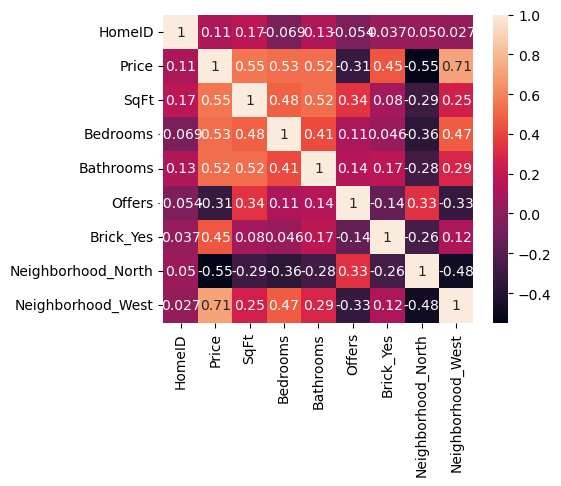

In [32]:
plt.figure(figsize = (5, 4))
sns.heatmap(corrs, annot=True)

In [33]:
#### Correction

In [34]:
house2.head()

,HomeID,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West
0,1,114300,1790,2,2,2,0,0,0
1,2,114200,2030,4,2,3,0,0,0
2,3,114800,1740,3,2,1,0,0,0
3,4,94700,1980,3,2,3,0,0,0
4,5,119800,2130,3,3,3,0,0,0


In [40]:
x.head()

,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West
0,1790,2,2,2,0,0,0
1,2030,4,2,3,0,0,0
2,1740,3,2,1,0,0,0
3,1980,3,2,3,0,0,0
4,2130,3,3,3,0,0,0


In [37]:
x2 = house2.iloc[:, [2,5,6,7,8]]
x2

,SqFt,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West
0,1790,2,0,0,0
1,2030,3,0,0,0
2,1740,1,0,0,0
3,1980,3,0,0,0
4,2130,3,0,0,0
...,...,...,...,...,...
123,1900,3,1,0,0
124,2160,3,1,0,0
125,2070,2,0,1,0
126,2020,1,0,0,1


In [41]:
## 234 한꺼번에 포함 불가

In [42]:
reg2 = sm.OLS(y, x2).fit()
print(reg2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              3822.
Date:                Mon, 13 Oct 2025   Prob (F-statistic):                   4.26e-133
Time:                        22:39:37   Log-Likelihood:                         -1368.6
No. Observations:                 128   AIC:                                      2747.
Df Residuals:                     123   BIC:                                      2761.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [44]:
[vif(x2.values, i) for i in range(0, x2.shape[1])]

[np.float64(13.208455818555418),
 np.float64(10.228260988833423),
 np.float64(1.602898905962283),
 np.float64(2.074198749140132),
 np.float64(2.07770616652305)]

In [45]:
# 1번이 아직 10보다 큰데 아직 correlation 남아있을 수 있다

## 1.2 Homoscedasticity

In [46]:
x2.head()

,SqFt,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West
0,1790,2,0,0,0
1,2030,3,0,0,0
2,1740,1,0,0,0
3,1980,3,0,0,0
4,2130,3,0,0,0


In [47]:
x2_c = sm.add_constant(x2)

In [48]:
reg3 = sm.OLS(y, x2_c).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     130.1
Date:                Mon, 13 Oct 2025   Prob (F-statistic):           3.61e-47
Time:                        22:47:19   Log-Likelihood:                -1368.4
No. Observations:                 128   AIC:                             2749.
Df Residuals:                     122   BIC:                             2766.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5624.6273   1.03

In [50]:
residual = reg3.resid
residual

0       7159.653091
1      -1215.091299
2       3611.051023
3     -17472.105389
4      -2101.063118
           ...     
123    -5314.282096
124     6022.191172
125   -11510.055829
126    -5721.597650
127     2498.370851
Length: 128, dtype: float64

In [51]:
## residual = error을 의미함

In [56]:
exog = reg3.model.exog

In [53]:
## Exogeneous variable = independant variable 다른 이름 just all x

In [57]:
## Breusch-Pagan test - 등분산성 검정

In [58]:
bp_test = sm.stats.het_breuschpagan(residual, exog)
bp_test

(np.float64(1.8446219679263294),
 np.float64(0.8701996051171319),
 np.float64(0.35677255079810805),
 np.float64(0.8770344952022547))

In [59]:
labels = ["Test Statistics","p-value", "f statistics", "f p-value"]

In [60]:
## 각각 1번째-Ts 이렇게 이름 붙여줌

In [61]:
list(zip(labels, bp_test))

[('Test Statistics', np.float64(1.8446219679263294)),
 ('p-value', np.float64(0.8701996051171319)),
 ('f statistics', np.float64(0.35677255079810805)),
 ('f p-value', np.float64(0.8770344952022547))]

In [62]:
## Correction (heteroscedasticity 고치기)

In [65]:
reg4 = sm.OLS(y, x2_c).fit(cov_types="HC3")
print(reg4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     130.1
Date:                Mon, 13 Oct 2025   Prob (F-statistic):           3.61e-47
Time:                        23:04:30   Log-Likelihood:                -1368.4
No. Observations:                 128   AIC:                             2749.
Df Residuals:                     122   BIC:                             2766.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5624.6273   1.03

In [66]:
## cov_types="HC3" 만 붙여주면 고쳐짐

## 1.3 Linearity

In [70]:
y_pred = reg2.predict()

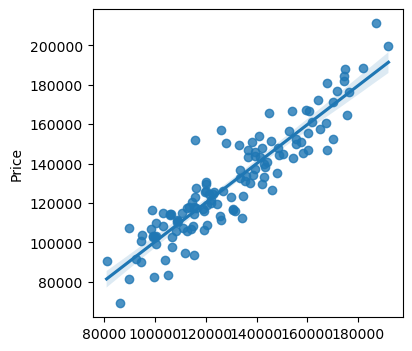

In [71]:
plt.figure(figsize=(4,4))
sns.regplot(x = y_pred, y = y)
plt.show()

In [72]:
# 선 옆에 연파랑 영역이 균일해야하는데 얇아졌다가 다시 넓어짐 -> 문제 있다는 뜻

In [73]:
residual = reg2.resid

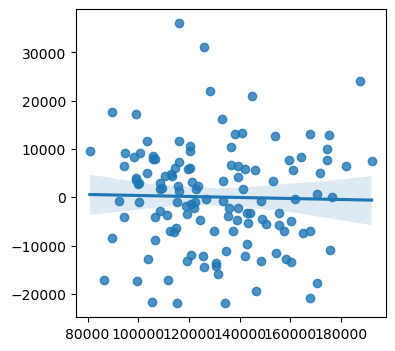

In [74]:
plt.figure(figsize=(4,4))
sns.regplot(x = y_pred, y = residual)
plt.show()

In [75]:
# 더 잘 보임

## 1.4 Normality of errors

<Figure size 400x400 with 0 Axes>

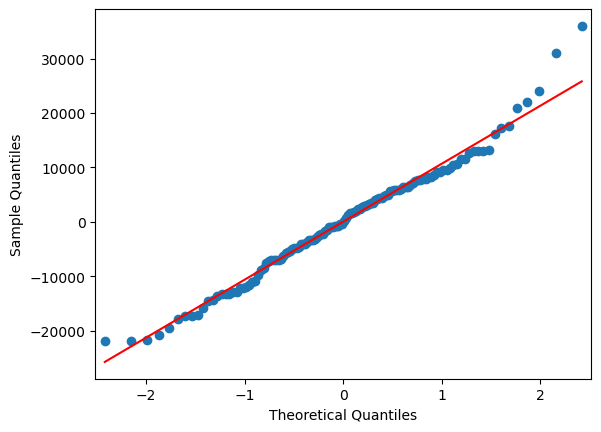

In [77]:
plt.figure(figsize=(4,4))
sm.qqplot(residual, line="s")
plt.show()